In [153]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy.spatial import distance as ssd
from matplotlib import pyplot as plt

In [154]:
plt.rcParams["figure.dpi"] = 150

# Getting started

Set the path to the data folder:

In [2]:
data_path = Path(r"D:\DATA\Mearns2020")

Import metadata

In [3]:
md = pd.read_csv(data_path.joinpath("mapped_bouts.csv"), index_col="bout_index", dtype={"ID": str, "video_code": str})

In [4]:
md

,transition_index,ID,video_code,start,end,ROI,state,module,phase
bout_index,,,,,,,,,
0,0,2017081001,2017081001171128,461,542,True,1251,2,0
1,1,2017081001,2017081001171128,858,952,True,2,2,0
2,2,2017081001,2017081001171128,1418,1502,True,1581,3,0
3,3,2017081001,2017081001171128,1851,1935,True,11,3,0
5,5,2017081001,2017081001171128,3240,3315,True,1565,4,0
...,...,...,...,...,...,...,...,...,...
97038,94188,2018040322,2018040322202929,28882,28963,True,1149,4,0
97039,94189,2018040322,2018040322202929,29247,29326,True,594,0,0
97040,94190,2018040322,2018040322202929,29596,29678,True,1414,5,1


# Import kinematic data for a single bout

In [5]:
bout_md = md.loc[0]
bout_md

transition_index                   0
ID                        2017081001
video_code          2017081001171128
start                            461
end                              542
ROI                             True
state                           1251
module                             2
phase                              0
Name: 0, dtype: object

In [6]:
trial_path = data_path.joinpath("kinematics", bout_md["ID"], bout_md["video_code"] + ".csv")
trial_kinematics = pd.read_csv(trial_path)

In [7]:
trial_kinematics

,k0,k1,k2,k3,k4,k5,k6,k7,k8,k9,...,k47,k48,k49,tip,length,left,right,speed,angular_velocity,tracked
0,-0.010209,-0.057768,-0.025698,0.076131,0.100434,0.053714,0.043783,0.044619,0.025993,-0.008202,...,0.003969,0.022786,0.056237,0.011602,187.503035,-0.297990,0.331401,123.712637,0.170362,True
1,-0.010379,-0.057938,-0.025869,0.076327,0.104450,0.068804,0.056673,0.036646,0.029275,0.005594,...,0.003798,0.022615,0.056067,0.010508,187.508730,-0.298194,0.343491,0.000000,0.000000,True
2,-0.010379,-0.057938,-0.025869,0.076327,0.104450,0.068804,0.056673,0.036646,0.029275,0.005594,...,0.003798,0.022615,0.056067,0.010508,187.508730,-0.298399,0.355581,148.056524,0.181867,True
3,-0.010379,-0.014517,0.028314,0.076327,0.100368,0.068804,0.060512,0.036646,0.029275,-0.002281,...,0.003142,0.022252,0.055703,0.009653,187.437354,-0.298399,0.355581,231.597192,0.291558,True
4,0.003573,-0.014517,0.028314,0.077946,0.100368,0.098623,0.068674,0.033743,-0.007178,-0.035881,...,-0.003000,-0.003966,-0.029973,-0.001637,187.412120,-0.298399,0.355581,0.000000,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30017,-0.117267,-0.037443,0.014733,0.027570,0.028713,0.028713,0.028713,0.028713,0.028713,0.028713,...,0.000758,-0.038651,-0.117267,-0.046890,191.545557,-0.427869,0.126229,41.952115,0.000000,True
30018,-0.117267,-0.037443,0.014733,0.028558,0.029695,0.029695,0.029509,0.028713,0.028713,0.028713,...,0.007281,-0.037705,-0.116529,-0.046410,192.533288,-0.427869,0.125628,45.586224,-0.491112,True
30019,-0.115546,-0.036122,0.015787,0.028558,0.029695,0.029695,0.029695,0.029695,0.029695,0.029695,...,0.014645,-0.036122,-0.115547,-0.045375,192.578164,-0.428223,0.125567,0.000000,0.000000,True
30020,-0.115546,-0.036122,0.015787,0.028558,0.029695,0.029695,0.029695,0.029695,0.029695,0.029695,...,0.014645,-0.036122,-0.115547,-0.045375,192.514814,-0.428576,0.125506,54.526294,-0.013029,True


In [8]:
bout = trial_kinematics.loc[bout_md["start"]:bout_md["end"], "k0":"k49"]
bout_array = bout.values  # only take the values (we don't need columns anymore)
bout_array.shape

(82, 50)

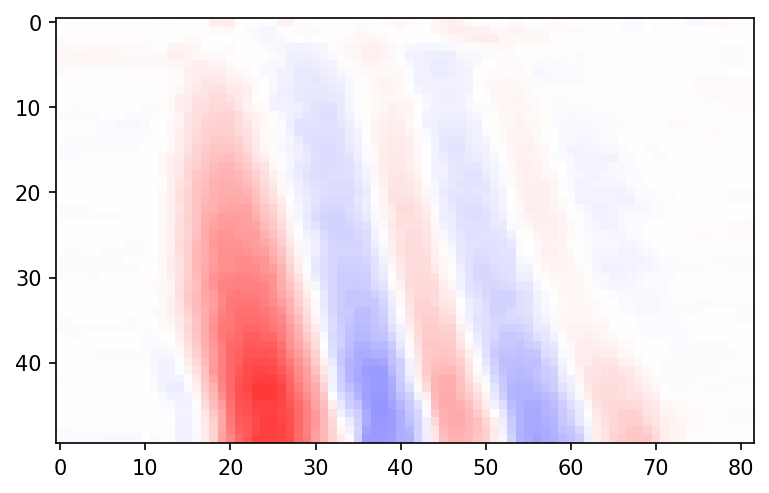

In [137]:
plt.imshow(bout_array.T, vmin=-np.pi, vmax=np.pi, cmap="bwr")

# Import all bouts

To import all bouts, we use the `BoutData` class. To speed things up, lets just import the precomputed exemplar bouts.

**NOTE:** In the old version of the analysis we are using here, the name of the trial is given the column name "video_code". In the new version, this is instead just called the "code".

In [10]:
from behavior_analysis import BoutData

In [11]:
exemplar_md = pd.read_csv(data_path.joinpath("exemplars.csv"), index_col="bout_index", dtype={"ID": str, "video_code": str})
exemplar_md = exemplar_md[exemplar_md["clean"]]  # some exemplars represent "dirty" clusters (i.e. not real bouts), so these should be removed
exemplar_md

,ID,video_code,start,end,cluster,clean,module
bout_index,,,,,,,
22,2017081001,2017081001171128,12244,12325,0,True,3
33,2017081001,2017081001171128,17304,17395,1,True,2
40,2017081001,2017081001171128,20294,20387,2,True,2
126,2017081001,2017081001171228,21398,21486,4,True,2
221,2017081001,2017081001171329,24491,24575,5,True,2
...,...,...,...,...,...,...,...
96498,2018040322,2018040322202528,16742,16839,2795,True,6
96670,2018040322,2018040322202628,26354,26417,2796,True,1
96811,2018040322,2018040322202729,28433,28528,2798,True,2


Import data. This will take a while since csv files are _super_ slow to read!

In [12]:
bout_data = BoutData.from_metadata(exemplar_md, data_path.joinpath("kinematics"), tail_only=True)  # for bout mapping we conly want tail kinematics

Opening 6 csv files...
########## 100%
done!
DataFrame has shape: (180213, 57).
Index levels: ('ID', 'video_code', 'frame').

Reformatting multi-indexed DataFrame... done!



C:\Users\mearns\Documents\Python\behavior_analysis_training\behavior_analysis\bout_data.py:119: FutureWarning: inplace is deprecated and will be removed in a future version.
  data.index.set_levels(data.index.levels[2].astype('int64'), level='bout_index', inplace=True)


In our `BoutData` object, the data is stored in the `data` attribute as a multi-indexed DataFrame, and metadata is stored in the `metadata` attribute:

In [13]:
type(bout_data)

behavior_analysis.bout_data.BoutData

In [14]:
bout_data.data

k0        k1        k2  \
ID         video_code       bout_index frame                                 
2017081001 2017081001171128 22         12244 -0.088558 -0.101014 -0.054326   
                                       12245 -0.088558 -0.101014 -0.054326   
                                       12246 -0.102757 -0.101014 -0.028404   
                                       12247 -0.102757 -0.108288 -0.028404   
                                       12248 -0.102757 -0.108288 -0.028404   
...                                                ...       ...       ...   
           2017081001171730 423        17105 -0.008845 -0.006511  0.000374   
                                       17106 -0.010221 -0.006511  0.000374   
                                       17107 -0.076166 -0.000647  0.033236   
                                       17108 -0.076166 -0.000647  0.033236   
                                       17109  0.003905  0.048539  0.056895   

                                                    k3        k4        k5  \
ID         video_code       bout_index frame                                 
2017081001 2017081001171128 22         12244  0.019279  0.072900  0.084438   
                                       12245  0.019279  0.072900  0.084438   
                                       12246  0.056622  0.042719  0.044170   
                                       12247  0.056622  0.041935  0.044170   
                                       12248  0.056622  0.041935  0.044170   
...                                                ...       ...       ...   
           2017081001171730 423        17105 -0.001126 -0.014701 -0.000277   
                                       17106 -0.001126 -0.007788 -0.000212   
                                       17107  0.011634 -0.007788  0.000918   
                                       17108  0.011634 -0.007788  0.000918   
                                       17109  0.011634 -0.014703  0.001972   

                                                    k6        k7        k8  \
ID         video_code       bout_index frame                                 
2017081001 2017081001171128 22         12244  0.093304  0.090867  0.079540   
                                       12245  0.093304  0.090867  0.079540   
                                       12246  0.084680  0.091380  0.083179   
                                       12247  0.084680  0.091713  0.083512   
                                       12248  0.084680  0.091713  0.083512   
...                                                ...       ...       ...   
           2017081001171730 423        17105  0.054241  0.090587  0.061887   
                                       17106  0.054241  0.090587  0.057136   
                                       17107  0.059403  0.101197  0.057136   
                                       17108  0.059403  0.073953  0.005258   
                                       17109  0.059403  0.073953 -0.017573   

                                                    k9  ...       k40  \
ID         video_code       bout_index frame            ...             
2017081001 2017081001171128 22         12244 -0.001480  ... -0.022555   
                                       12245 -0.001480  ... -0.022555   
                                       12246  0.030314  ... -0.028404   
                                       12247  0.030647  ... -0.028404   
                                       12248  0.030647  ... -0.028404   
...                                                ...  ...       ...   
           2017081001171730 423        17105  0.065494  ... -0.150217   
                                       17106  0.012147  ... -0.157351   
                                       17107 -0.015891  ... -0.157351   
                                       17108 -0.023814  ... -0.157351   
                                       17109 -0.023814  ... -0.157351   

                                                   k41   

In [15]:
bout_data.metadata

,ID,video_code,start,end,cluster,clean,module
bout_index,,,,,,,
22,2017081001,2017081001171128,12244,12325,0,True,3
33,2017081001,2017081001171128,17304,17395,1,True,2
40,2017081001,2017081001171128,20294,20387,2,True,2
126,2017081001,2017081001171228,21398,21486,4,True,2
221,2017081001,2017081001171329,24491,24575,5,True,2
247,2017081001,2017081001171429,2777,2864,6,True,2
365,2017081001,2017081001171629,23178,23263,7,True,3
415,2017081001,2017081001171730,13443,13535,8,True,2
421,2017081001,2017081001171730,16170,16255,9,True,2


# PCA

Before mapping bouts into the behavior space, we need to do PCA. We do this using the `sklearn.decomposition.PCA` class. First, we will do this from first principles.

Before doing PCA, we "whiten" the data (i.e. express our varialbes in terms of a z-score). The z-score is how many standard deviations a data point is away from the mean and it is computed by subtracting the mean and dividing by the standard deviation.

In [16]:
from sklearn.decomposition import PCA

In [17]:
mean = bout_data.data.mean(axis=0)
std = bout_data.data.std(axis=0)

In [18]:
whitened = (bout_data.data - mean) / std
whitened.shape

(890, 50)

In [19]:
pca = PCA()
transformed = pca.fit_transform(whitened)  # should need to use
transformed.shape

(890, 50)

Now that we have fit the PCA model, we can see the explained variance and principal components.

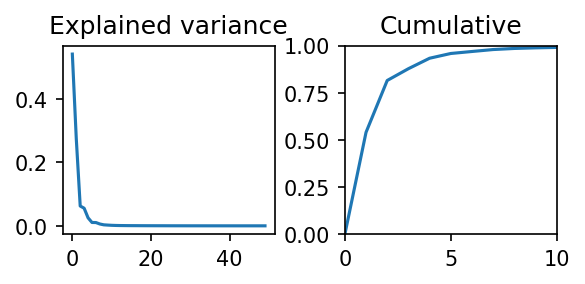

In [139]:
explained_var = pca.explained_variance_ratio_

fig, axes = plt.subplots(1, 2, figsize=(4, 2))

axes[0].plot(explained_var)
axes[0].set_title("Explained variance")

axes[1].plot([0] + list(np.cumsum(explained_var)))
axes[1].set_title("Cumulative")
axes[1].set_xlim(0, 10)
axes[1].set_ylim(0, 1)

plt.tight_layout()

In [140]:
principal_components = pca.components_
principal_components.shape

(50, 50)

Remember, the principal components are of the whitened data. To compute the shape of the eigenfish, we need to "unwhiten" the PCs.

In [141]:
eigenfish = (30 * principal_components * std.values) + mean.values

Plot first three eigenfish

(-2.45, 51.45, -4.019353611810871, 5.7470893667827765)

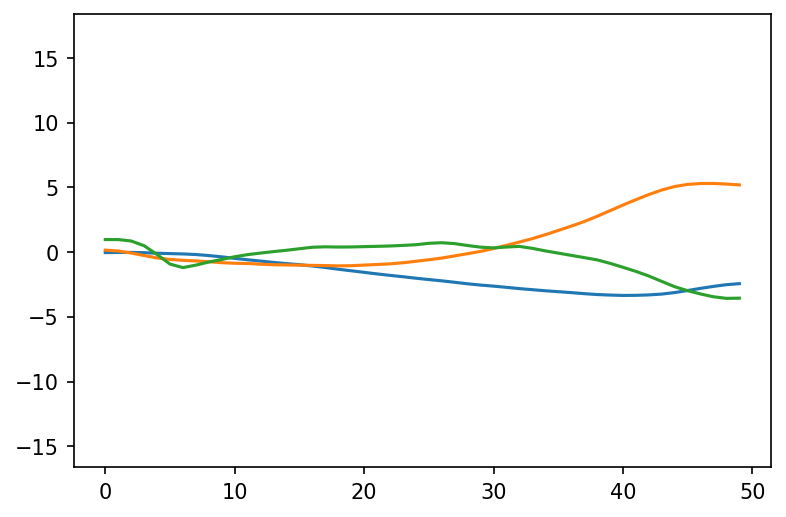

In [142]:
x = np.arange(0, eigenfish.shape[1])
for i in range(3):
    plt.plot(x, eigenfish[i])
plt.gca().axis("equal")

These look a little funky because we only used a small subset of the data to compute the eigenfish.

We can do the full PCA with a single line of code if we use the `BoutData` class:

In [24]:
transformed, pca = bout_data.transform(whiten=True)  # whitens the data and projects bouts onto PCs

In [25]:
transformed.data

0         1         2   \
ID         video_code       bout_index frame                                 
2017081001 2017081001171128 22         12244 -1.102316 -1.273312 -2.024664   
                                       12245 -1.102316 -1.273312 -2.024664   
                                       12246 -1.159666 -1.224331 -1.759756   
                                       12247 -1.187000 -1.248870 -1.787458   
                                       12248 -1.187000 -1.248870 -1.787458   
...                                                ...       ...       ...   
           2017081001171730 423        17105 -0.198516 -1.401073 -0.715714   
                                       17106 -0.115279 -1.258317 -0.670688   
                                       17107 -0.083332 -1.288459 -0.650932   
                                       17108 -0.002637 -1.079822 -0.461837   
                                       17109 -0.045229 -0.981412  0.258473   

                                                    3         4         5   \
ID         video_code       bout_index frame                                 
2017081001 2017081001171128 22         12244 -0.308216 -1.110788  0.567280   
                                       12245 -0.308216 -1.110788  0.567280   
                                       12246 -0.574601 -1.275744 -0.079187   
                                       12247 -0.553120 -1.296565 -0.094345   
                                       12248 -0.553120 -1.296565 -0.094345   
...                                                ...       ...       ...   
           2017081001171730 423        17105 -0.865096  0.343506 -0.482110   
                                       17106 -0.810409  0.245733 -0.340096   
                                       17107 -0.851722 -0.285881 -0.666025   
                                       17108 -0.715342 -0.413790 -0.478977   
                                       17109 -1.081776  0.225453 -0.135723   

                                                    6         7         8   \
ID         video_code       bout_index frame                                 
2017081001 2017081001171128 22         12244  0.241967 -0.079653  0.483873   
                                       12245  0.241967 -0.079653  0.483873   
                                       12246  0.314066 -0.079615  0.679617   
                                       12247  0.270929 -0.058884  0.732945   
                                       12248  0.270929 -0.058884  0.732945   
...                                                ...       ...       ...   
           2017081001171730 423        17105  0.403261 -0.635679 -0.201330   
                                       17106  0.412176 -0.461915 -0.180926   
                                       17107  0.738523 -0.051439 -0.390997   
                                       17108  0.584856  0.166214 -0.511342   
                                       17109  0.769175  0.171880 -0.537307   

                                                    9   ...        40  \
ID         video_code       bout_index frame            ...             
2017081001 2017081001171128 22         12244 -0.485047  ... -0.000482   
                                       12245 -0.485047  ... -0.000482   
                                       12246 -0.258455  ... -0.001029   
                                       12247 -0.239042  ... -0.010295   
                                       12248 -0.239042  ... -0.010295   
...                                                ...  ...       ...   
           2017081001171730 423        17105 -0.030046  ... -0.001837   
                                       17106 -0.241629  ... -0.021382   
                                       17107 -0.360014  ... -0.018714   
                                       17108 -0.458222  ... -0.013668   
                                       17109 -0.468946  ... -0.024641   

                                                    41   

Lets plot the bouts as trajectories in PC space!

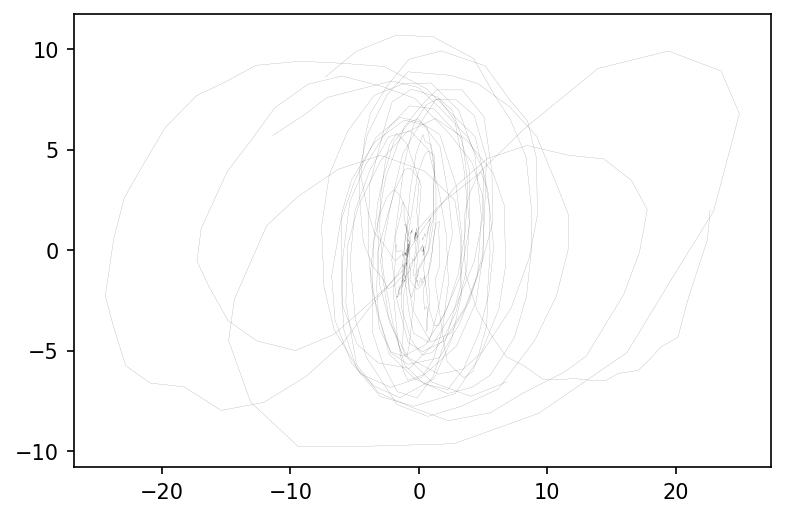

In [143]:
for idx, bout in transformed.iter(values=True):
    plt.plot(bout[:, 0], bout[:, 1], lw=0.1, c="k", alpha=0.5)

# DTW

Next, let's compute the "distance" between each pair of bouts using dynamic time warping (DTW).

We will use the `ethomap` library for this.

In [27]:
from ethomap import DynamicTimeWarping, pdist_dtw

In [28]:
help(DynamicTimeWarping)

Help on class DynamicTimeWarping in module ethomap.dtw:

class DynamicTimeWarping(builtins.object)
 |  DynamicTimeWarping(x: numpy.ndarray = None, y: numpy.ndarray = None, bw: float = 0.01, fs: float = 500.0, metric='euclidean', pad=True)
 |  
 |  Dynamic time warping class.
 |  
 |  Parameters
 |  ----------
 |  x, y : np.ndarray
 |      1D (n_samples,) or 2D (n_samples, n_features) template time series (x) and time series to align (y).
 |  bw : float
 |      Bandwidth of the Sakoe-Chiba band (in seconds).
 |  fs : float
 |      Sampling frequency of the time series (samples per second).
 |  metric : str
 |      Metric for calculating initial cost matrix. Default = "euclidean".
 |  pad : bool
 |      If True (default), pads the shorter series with zeros so that x and y are of equal length.
 |  
 |  Attributes
 |  ----------
 |  x_ : np.ndarray
 |      Zero-padded copy of x.
 |  y_ : np.ndarray
 |      Zero-padded copy of y
 |  dtw_ : np.ndarray
 |      Dynamic time warping distance ma

In [29]:
help(pdist_dtw)

Help on function pdist_dtw in module ethomap.distance:

pdist_dtw(series: Iterable[numpy.ndarray], parallel_processing: bool = True, n_processors: int = -1, **kwargs)
    Compute the pairwise dtw distances between series.
    
    Parameters
    ----------
    series : iterable of array_like
        Time series to align.
    parallel_processing : bool, default True
        If True, compute each row of the distance matrix in parallel.
    n_processors : int, default -1
        Number of processors to use if parallel_processing is True. Default (-1) uses all available processors.
    kwargs
        Passed to multi_dtw.
    
    Returns
    -------
    D : np.ndarray
        Condensed distance matrix.
    
    See Also
    --------
    multi_dtw, dtw.DynamicTimeWarping, scipy.spatial.distance.pdist, scipy.spatial.distance.squareform



First, let's compute the distance between a pair of bouts to see what's happening:

In [113]:
ndim = 3  # keep first 3 PCs

In [114]:
example_1 = transformed.get(idxs=(0,)).data.values[:, :ndim]
example_2 = transformed.get(idxs=(3,)).data.values[:, :ndim]

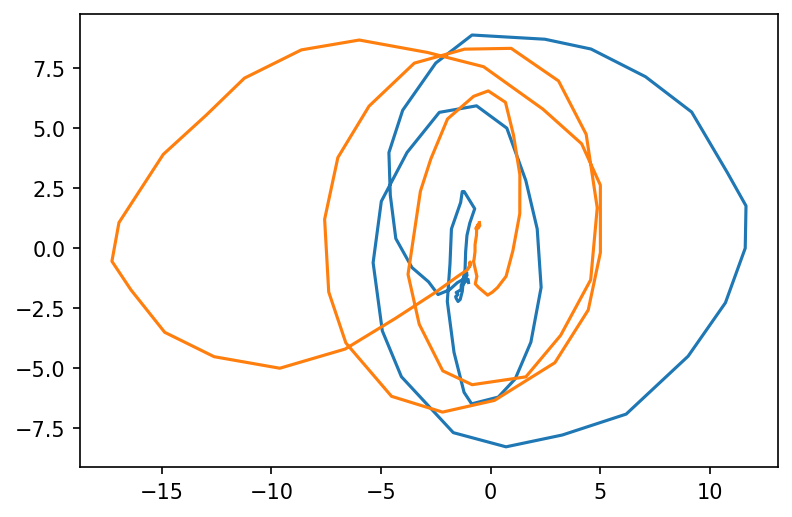

In [144]:
plt.plot(*example_1[:, :2].T)
plt.plot(*example_2[:, :2].T)

In [116]:
dtw = DynamicTimeWarping(example_1, fs=500., bw=0.02)
distance = dtw.align(example_2)
print(distance)

idxs, aligned = dtw.path()  # find path of optimal alignment

417.73849478991514


What if we mirror one of the bouts?

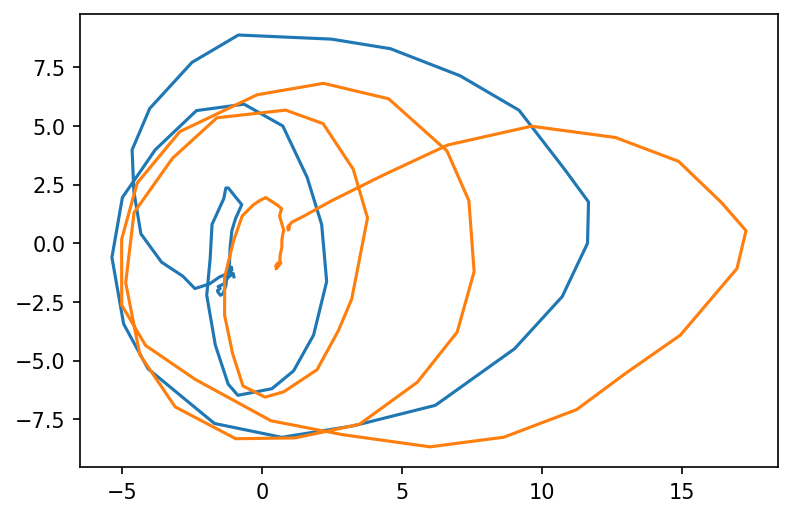

In [145]:
plt.plot(*example_1[:, :2].T)
plt.plot(*-example_2[:, :2].T)

In [118]:
distance_mirrored = dtw.align(-example_2)
print(distance_mirrored)

idxs_mirrored, aligned_mirrored = dtw.path()  # find path of optimal alignment

354.01504444711264


Note that if we mirror the second bout, it is more similar to the template.

What is the dtw algorithm doing?

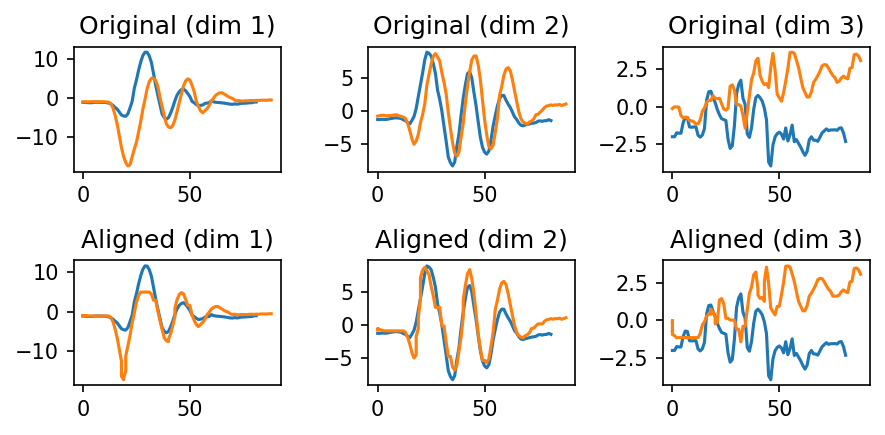

In [146]:
fig, axes = plt.subplots(2, 3, figsize=(6, 3))

for i in range(3):
    axes[0][i].plot(example_1[:, i])
    axes[0][i].plot(example_2[:, i])
    axes[0][i].set_title(f"Original (dim {i + 1})")

    axes[1][i].plot(example_1[:, i])
    axes[1][i].plot(idxs, aligned[:, i])
    axes[1][i].set_title(f"Aligned (dim {i + 1})")

plt.tight_layout()

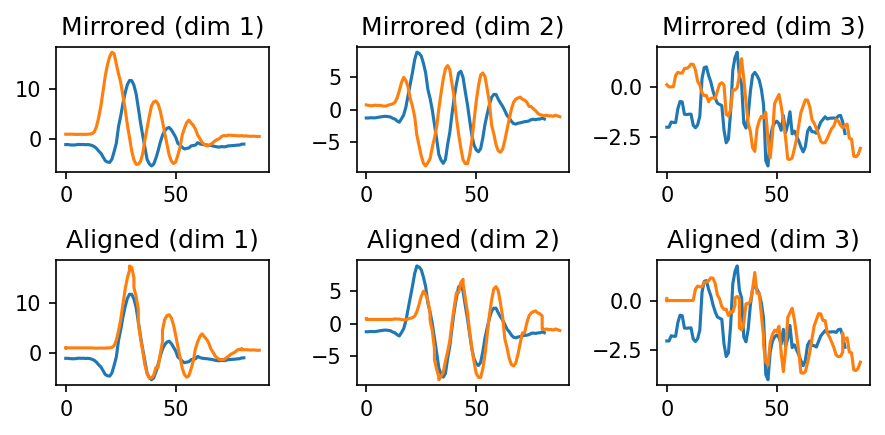

In [147]:
fig, axes = plt.subplots(2, 3, figsize=(6, 3))

for i in range(3):
    axes[0][i].plot(example_1[:, i])
    axes[0][i].plot(-example_2[:, i])
    axes[0][i].set_title(f"Mirrored (dim {i + 1})")

    axes[1][i].plot(example_1[:, i])
    axes[1][i].plot(idxs_mirrored, aligned_mirrored[:, i])
    axes[1][i].set_title(f"Aligned (dim {i + 1})")

plt.tight_layout()

Now lets compute the pairwise distances between all our bouts (allowing for mirroring if it makes for better alignment: we don't care about left/right).

In [149]:
all_bouts = transformed.to_list(values=True, ndims=3)
print("Number of bouts:", len(all_bouts))
print("Shape of first bout:", all_bouts[0].shape)

Number of bouts: 10
Shape of first bout: (82, 3)


In [152]:
import time
t0 = time.time()
distances_condensed = pdist_dtw(all_bouts, n_processors=4, fs=500., bw=0.02)
print("Time taken:", time.time() - t0, "seconds")

Time taken: 0.07180476188659668 seconds


**Note**: since this is a pairwise computation it scales with the square of the number of bouts!

Lets look at the distance matrix:

In [155]:
distance_matrix = ssd.squareform(distances_condensed)

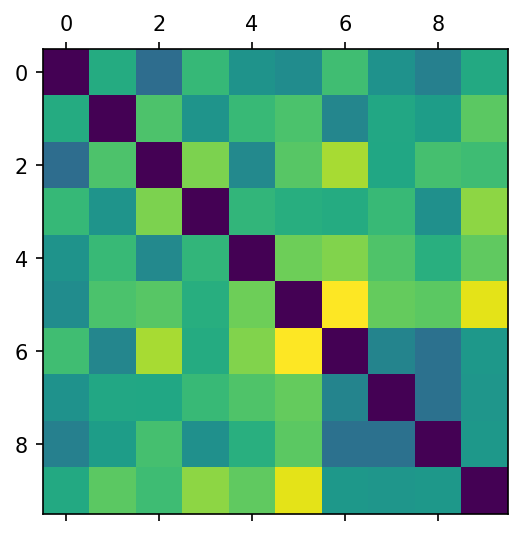

In [156]:
plt.matshow(distance_matrix)

# Affinity propagation

If we have a very large dataset, we might want to select only a subset of bouts for embedding. To chose the best bouts that will still preserve the overall structure of the behavioral "manifold", we can use a clustering algorithm called affinity propagation.

In [157]:
from ethomap import affinity_propagation

In [158]:
clusterer = affinity_propagation(distance_matrix)

In [161]:
type(clusterer)

sklearn.cluster._affinity_propagation.AffinityPropagation

**Note:** The `affinity_propagation` from ethomap returns an instance of `sklearn.cluster.AffinityPropagation`.

In [164]:
exemplar_idxs = clusterer.cluster_centers_indices_
print(len(exemplar_idxs))

2


In [165]:
exemplar_distances = distance_matrix[exemplar_idxs, :][:, exemplar_idxs]
exemplar_distances.shape

(2, 2)

# Isomap

Lets use the original exemplar distance matrix from my paper for the isomap embedding.

In [166]:
exemplar_distances = np.load(data_path.joinpath("exemplar_distance_matrix.npy"))
exemplar_distances.shape

(1744, 1744)

To make the behavioral space, we perform isomap embedding using our precomputed distance matrix. We could use `sklearn.manifold.Isomap`, but it is slightly buggy when embedding a precomputed matrix. So instead we use `IsomapPrecomputed` from `ethomap`, which works in exactly the same way (*but without the bug, of course!*).

In [167]:
from ethomap import IsomapPrecomputed

In [169]:
isomap = IsomapPrecomputed(n_neighbors=10, n_components=3)

In [170]:
embedding = isomap.fit_transform(exemplar_distances)
print(embedding.shape)

(1744, 3)


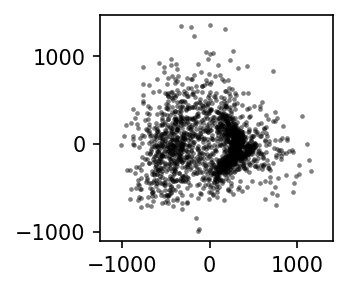

In [175]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.scatter(*embedding[:, :2].T, lw=0, s=5, c="k", alpha=0.5)
ax.axis("equal");

# Sequence analysis (SVD)

Now let's analyze bout sequences! To do this, let's take another look at our original metadata data frame.

In [176]:
md

,transition_index,ID,video_code,start,end,ROI,state,module,phase
bout_index,,,,,,,,,
0,0,2017081001,2017081001171128,461,542,True,1251,2,0
1,1,2017081001,2017081001171128,858,952,True,2,2,0
2,2,2017081001,2017081001171128,1418,1502,True,1581,3,0
3,3,2017081001,2017081001171128,1851,1935,True,11,3,0
5,5,2017081001,2017081001171128,3240,3315,True,1565,4,0
...,...,...,...,...,...,...,...,...,...
97038,94188,2018040322,2018040322202929,28882,28963,True,1149,4,0
97039,94189,2018040322,2018040322202929,29247,29326,True,594,0,0
97040,94190,2018040322,2018040322202929,29596,29678,True,1414,5,1


Note the columns called "transition_index" and "state". Let's look at a single video:

In [180]:
first_trial = md.groupby("video_code").get_group("2017081001171128")
first_trial.head(n=10)

,transition_index,ID,video_code,start,end,ROI,state,module,phase
bout_index,,,,,,,,,
0,0,2017081001,2017081001171128,461,542,True,1251,2,0
1,1,2017081001,2017081001171128,858,952,True,2,2,0
2,2,2017081001,2017081001171128,1418,1502,True,1581,3,0
3,3,2017081001,2017081001171128,1851,1935,True,11,3,0
5,5,2017081001,2017081001171128,3240,3315,True,1565,4,0
7,6,2017081001,2017081001171128,4896,4968,True,830,4,0
9,7,2017081001,2017081001171128,5786,5881,True,1689,4,0
10,8,2017081001,2017081001171128,6248,6331,True,1058,4,0
12,10,2017081001,2017081001171128,7088,7173,True,1397,2,0


Note that the transition index does not increase monotonically, nor does it match the bout index. This is because of bout filtering steps I performed in the preprocessing of these initial data. The bout index corresponds to the actual index of the bout that was detected. However, bouts were excluded at various stages of the analysis due to, e.g.,  noise in tracking, removed after manual inspection of affinity propagation clusters, or if the tail hit the side of the behavior chamber (which correspond to a real bout, but with potentially distorted tail kinematics).

**For sequence analysis, ideally we want the transition index to correspond to the ordinal number of the bout in the video. Missing bouts are fine - as long as we *know* that they are missing!**

The "state" correspond to the affinity propagation cluster label. We can only analyze sequences if we have a defined number of states that are visited multiple times. This is one of the main reasons for the affinity propagation step.

In [182]:
clusterer.labels_  # the "state" is a bout's corresponding affinity propagation cluster label

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

With all this in mind, let's compute a transition frequency matrix between all our states!

In [184]:
n_states = md["state"].max() + 1
print(n_states)

1744


In [189]:
T = np.zeros((n_states, n_states))  # create empty transition matrix

for trial, trial_md in md.groupby("video_code"):  # we can't assume that numbers increase monotonically from one trial to the next!
    transition_idxs = trial_md["transition_index"].values
    state_sequence = trial_md["state"].values
    t0, = np.where(np.diff(transition_idxs) == 1)  # find where transition index increases monotonically
    transitions = np.array([state_sequence[t0], state_sequence[t0 + 1]]).T  # take the state at t0 and t0 + 1
    for s0, s1 in transitions:  # iterate through state transition pairs
        T[s1, s0] += 1  # T[i, j] = number of transition from j to i

Alternative, we can compute the same matrix using `ethomap`

In [191]:
from ethomap import transition_matrix

In [194]:
T = np.zeros((n_states, n_states))  # create empty transition matrix
for trial, trial_md in md.groupby("video_code"):
    transition_idxs = trial_md["transition_index"].values
    state_sequence = trial_md["state"].values
    trial_counts = transition_matrix(state_sequence, index=transition_idxs, n_states=n_states)
    T += trial_counts

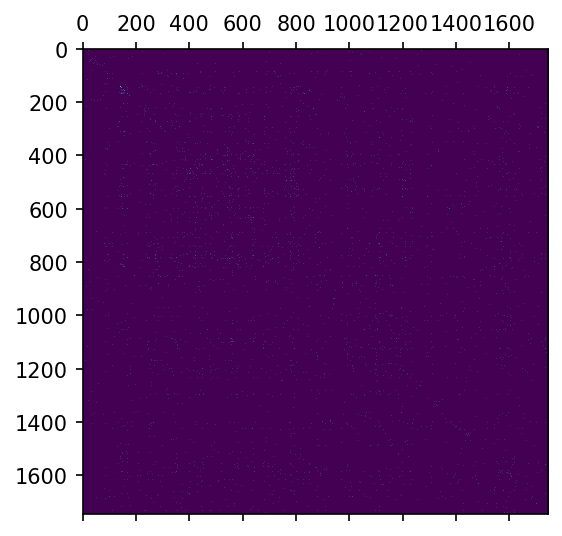

In [195]:
plt.matshow(T)

Note how sparse this matrix is! We underclustered our data so that we didn't lose too much structure from our behavior space, but now it will cause problems for the SVD because our matrix is "singular" (i.e. not fully connected).

We fix this by "smooshing" transitions together. If two states, *a* and *b*, are kinematically really similar, we assume that a transition to *a* could just as easily have ended up at *b* (but maybe not *c* is it's sufficiently different).

Fortunately, we know which states are kinematically similar, because we've already embedded them in a manifold!

Ethomap has functions for redistributing transitions, which we can use (see source code for implementation details).

In [198]:
from ethomap import weight_matrix, redistribute_transitions

In [206]:
weights = weight_matrix(embedding)
T_new = redistribute_transitions(T, weights)

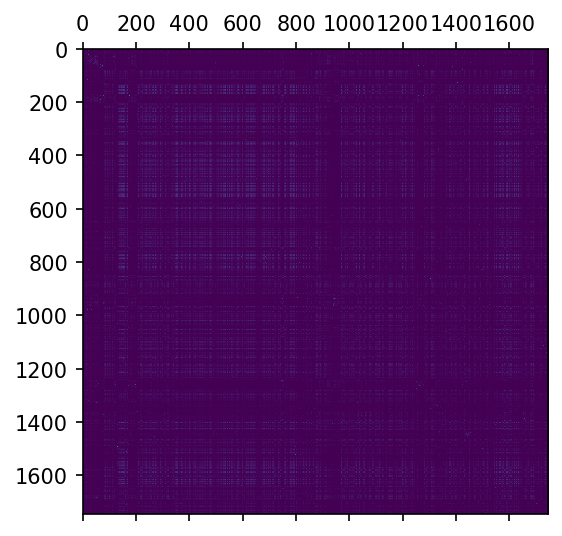

In [207]:
plt.matshow(T_new)

Much better!

Finally, we can compute the transition modes:

In [208]:
from ethomap import transition_modes

In [209]:
USVs, USVa = transition_modes(T_new)

## Interpretation

The SVD of a matrix completely describes the geometric operation of that matrix on a space. Every matrix operates on a space by scaling (i.e. stretching) it along some vectors, rotating the space, or a combination of the two. These operations are captured in the SVD:

$$ M = USV^T $$

Let's create a random matrix and compute its SVD.

In [401]:
M = np.random.rand(2, 2)

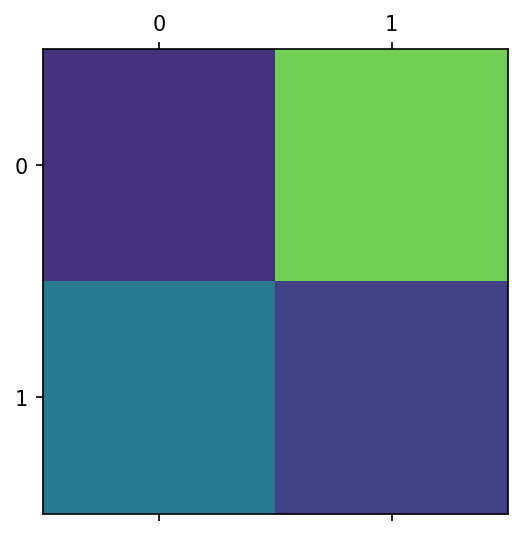

In [402]:
plt.matshow(M, vmin=0, vmax=1)

Compute the SVD

In [403]:
U, sv, Vt = np.linalg.svd(M)

In [404]:
print(U.shape)
print(sv.shape)
print(Vt.shape)

(2, 2)
(2,)
(2, 2)


In [405]:
print(U @ np.diag(sv) @ Vt, end="\n\n")

[[0.14458561 0.78612011]
 [0.41098938 0.19011509]]



In [406]:
print(M)

[[0.14458561 0.78612011]
 [0.41098938 0.19011509]]


The way to read the SVD is as follows: 

*The matrix $M$ takes the nth row of $V^T$, scales it by the nth singular value, and rotates it onto the nth column of $U$.*

Let's see that in action...

In [407]:
np.dot(M, Vt[0])

array([-0.78866503, -0.31798654])

In [408]:
U[:, 0] * sv[0]

array([-0.78866503, -0.31798654])

Let's look at a geometric interpretation

In [409]:
X, Y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
grid = np.array(list(zip(X.ravel(), Y.ravel())))

In [410]:
grid_m = np.dot(M, grid.T).T

(-2.2, 2.2, -2.2, 2.2)

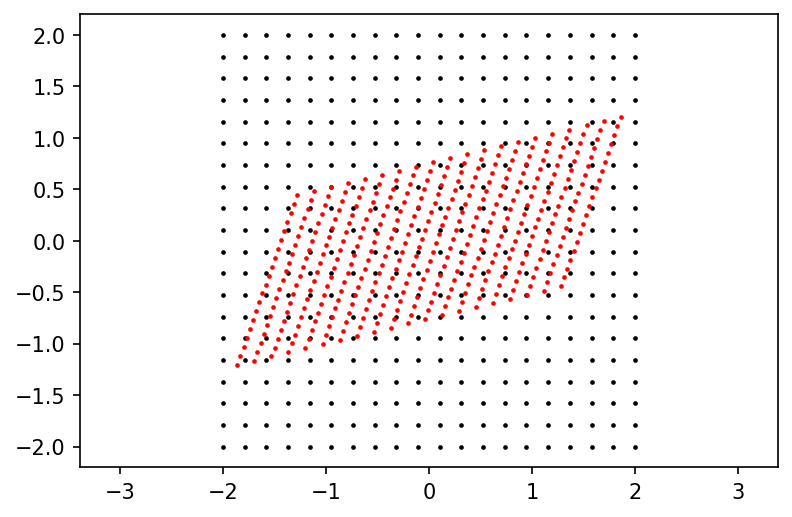

In [411]:
fig, ax = plt.subplots()
ax.scatter(*grid.T, c='k', lw=0, s=5)
ax.scatter(*grid_m.T, c='r', lw=0, s=5)
ax.axis("equal")

In [412]:
v0 = np.outer(np.linspace(0, 1, 2), Vt[0])
v1 = np.outer(np.linspace(0, 1, 2), Vt[1])

u0 = np.outer(np.linspace(0, 1, 2), U[:, 0]) * sv[0]
u1 = np.outer(np.linspace(0, 1, 2), U[:, 1]) * sv[1]

(-2.2, 2.2, -2.2, 2.2)

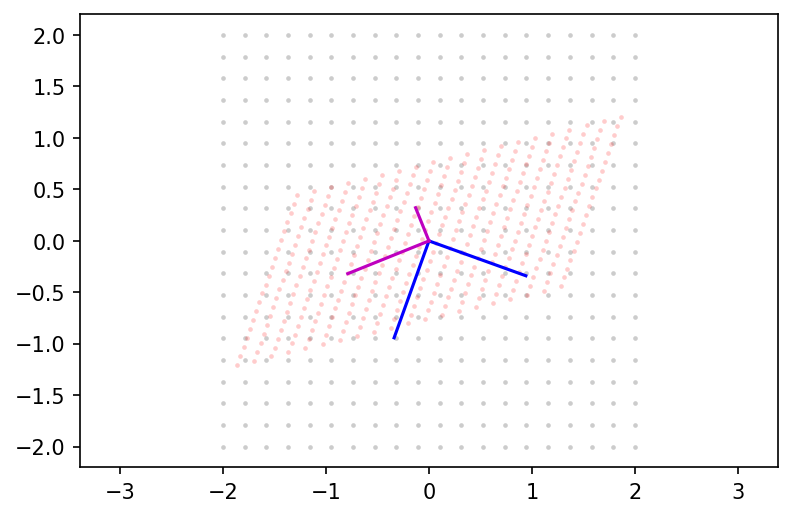

In [413]:
fig, ax = plt.subplots()

ax.scatter(*grid.T, c='k', lw=0, s=5, alpha=0.2)
ax.scatter(*grid_m.T, c='r', lw=0, s=5, alpha=0.2)

ax.plot(*v0.T, c="b")
ax.plot(*v1.T, c="b")

ax.plot(*u0.T, c="m")
ax.plot(*u1.T, c="m")

ax.axis("equal")

Note that:
1. The V and U constitute two orthonormal bases
2. This matrix performs both a rotation and a scaling of the space it operates on

We can separate out the rotation and scaling effects of $M$ by expressing it as the sum to two different matrices:
$$ M = M_S + M_A $$
where $M_S= {1 \over 2} (M + M^T)$ and $M_A={1 \over 2} (M - M^T)$.

In [432]:
Ms = 0.5 * (M + M.T)
Ma = 0.5 * (M - M.T)

$M_S$ is a symmetric matrix and $M_A$ is an antisymmetric matrix

[[0.14458561 0.59855475]
 [0.59855475 0.19011509]]
[[ 0.          0.18756536]
 [-0.18756536  0.        ]]


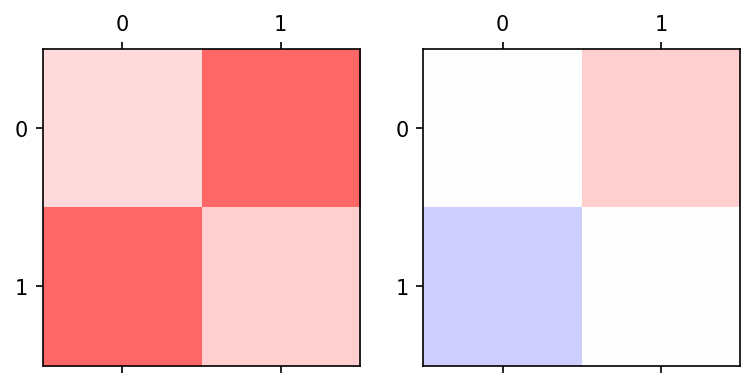

In [433]:
fig, axes = plt.subplots(1, 2)
axes[0].matshow(Ms, vmin=-1, vmax=1, cmap="bwr")
axes[1].matshow(Ma, vmin=-1, vmax=1, cmap="bwr")
print(Ms)
print(Ma)

Now lets look at the SVD of $M_S$ and $M_A$

Text(0.5, 0.98, 'SVD of M (symmetric)')

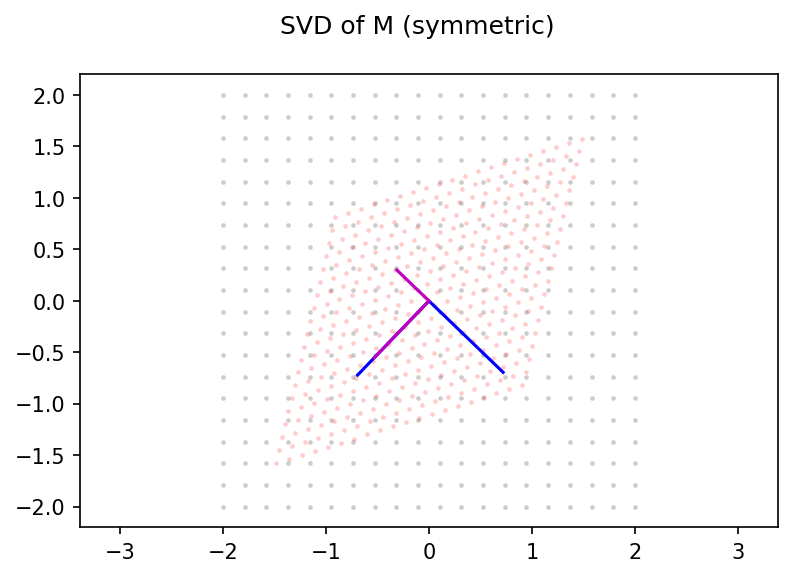

In [434]:
U, sv, Vt = np.linalg.svd(Ms)
grid_m = np.dot(Ms, grid.T).T

v0 = np.outer(np.linspace(0, 1, 2), Vt[0])
v1 = np.outer(np.linspace(0, 1, 2), Vt[1])

u0 = np.outer(np.linspace(0, 1, 2), U[:, 0]) * sv[0]
u1 = np.outer(np.linspace(0, 1, 2), U[:, 1]) * sv[1]

fig, ax = plt.subplots()

ax.scatter(*grid.T, c='k', lw=0, s=5, alpha=0.2)
ax.scatter(*grid_m.T, c='r', lw=0, s=5, alpha=0.2)

ax.plot(*v0.T, c="b")
ax.plot(*v1.T, c="b")

ax.plot(*u0.T, c="m")
ax.plot(*u1.T, c="m")

ax.axis("equal")

fig.suptitle("SVD of M (symmetric)")

Note that U is just V scaled by the singular values

Text(0.5, 0.98, 'SVD of M (antisymmetric)')

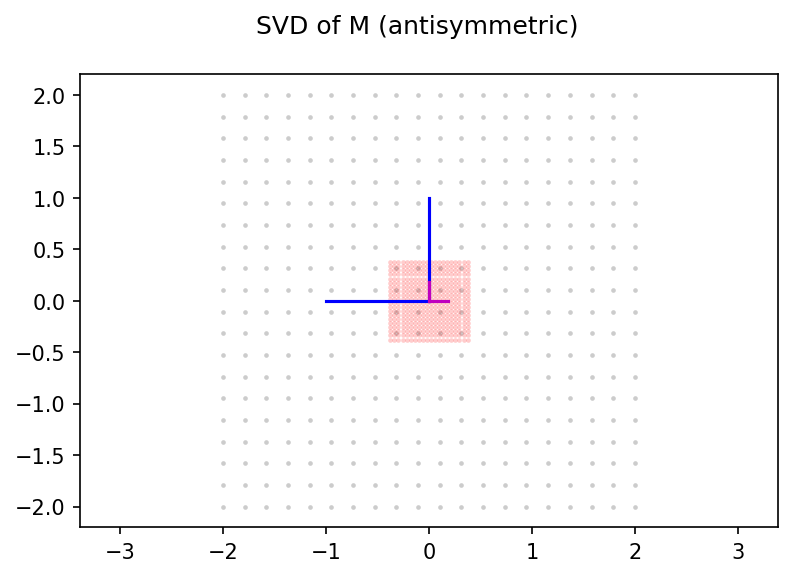

In [435]:
U, sv, Vt = np.linalg.svd(Ma)
grid_m = np.dot(Ma, grid.T).T

v0 = np.outer(np.linspace(0, 1, 2), Vt[0])
v1 = np.outer(np.linspace(0, 1, 2), Vt[1])

u0 = np.outer(np.linspace(0, 1, 2), U[:, 0]) * sv[0]
u1 = np.outer(np.linspace(0, 1, 2), U[:, 1]) * sv[1]

fig, ax = plt.subplots()

ax.scatter(*grid.T, c='k', lw=0, s=5, alpha=0.2)
ax.scatter(*grid_m.T, c='r', lw=0, s=5, alpha=0.2)

ax.plot(*v0.T, c="b")
ax.plot(*v1.T, c="b")

ax.plot(*u0.T, c="m")
ax.plot(*u1.T, c="m")

ax.axis("equal")

fig.suptitle("SVD of M (antisymmetric)")

Note that U is just V **rotated by $90^o$** and scaled by the singular values

## Symmetric transitions

We will show the loadings of the right singular vectors (V) on the top, and the corresponding left singular vectors (U) on the bottom.

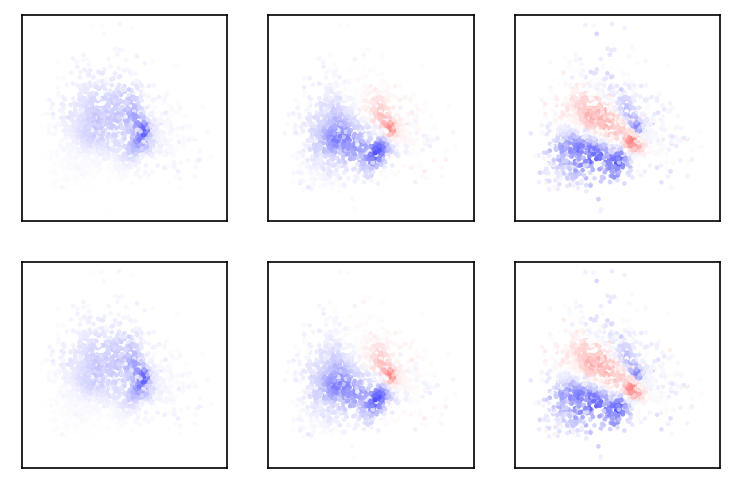

In [438]:
fig, axes = plt.subplots(2, 3, figsize=(6, 4))
for i, row in enumerate(axes.T):
    row[0].scatter(*embedding[:, :2].T, lw=0, s=5, c=USVs[2, :, i], vmin=-0.1, vmax=0.1, cmap="bwr")
    row[1].scatter(*embedding[:, :2].T, lw=0, s=5, c=USVs[0, :, i], vmin=-0.1, vmax=0.1, cmap="bwr")
    for ax in row:
        ax.axis("equal")
        ax.set_xticks([])
        ax.set_yticks([])

Note, that V and U are the same. Each symmetric transition mode is like a "collective bout state" that decays according to its corresponding singular value.

Text(0.5, 1.0, 'Singular values (symmetric)')

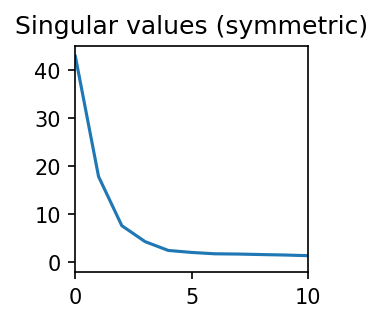

In [444]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(np.diag(USVs[1]))
ax.set_xlim(0, 10)
ax.set_title("Singular values (symmetric)")

## Antisymmetric transitions

As before, we will show the loadings of the right singular vectors (V) on the top, and the corresponding left singular vectors (U) on the bottom.

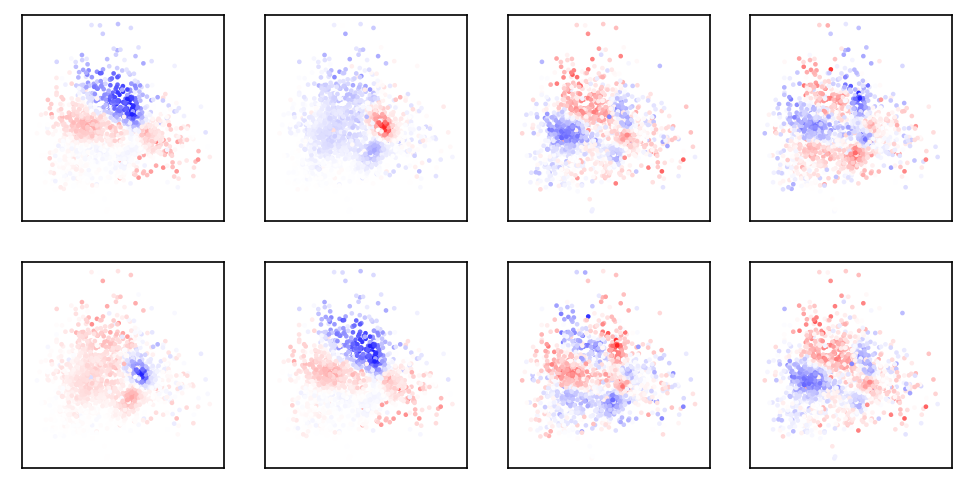

In [437]:
fig, axes = plt.subplots(2, 4, figsize=(8, 4))
for i, row in enumerate(axes.T):
    row[0].scatter(*embedding[:, :2].T, lw=0, s=5, c=USVa[2, :, i], vmin=-0.1, vmax=0.1, cmap="bwr")
    row[1].scatter(*embedding[:, :2].T, lw=0, s=5, c=USVa[0, :, i], vmin=-0.1, vmax=0.1, cmap="bwr")
    for ax in row:
        ax.axis("equal")
        ax.set_xticks([])
        ax.set_yticks([])

Note, that:
$$v_1 = -u_0$$ and $$v_0 = u_1$$

Thus, each *pair* of adjacent singular vectors represents a complete rotation through the behavior space, defining a single antisymmetric transition mode.

Text(0.5, 1.0, 'Singular values (antisymmetric)')

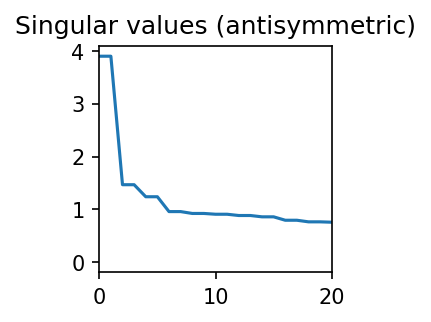

In [446]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(np.diag(USVa[1]))
ax.set_xlim(0, 20)
ax.set_title("Singular values (antisymmetric)")

Here, a single antisymmetric mode dominates. Since two pairs of singular vectors are required to describe a full rotation, we each singular vector is repeated twice.

Text(0.5, 1.0, 'Singular values (antisymmetric)')

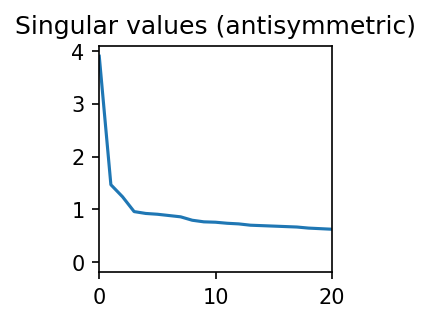

In [447]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(np.diag(USVa[1])[::2])
ax.set_xlim(0, 20)
ax.set_title("Singular values (antisymmetric)")

## Final gotcha's

The `transition_modes` function from `ethomap` returns the SVD of matrices $T_S$ and $T_A$ with the right singular vectors expressed in *columns rather than rows*.

Thus, if:
$$T_S = U_S.S_S.V_S^T$$

and
$$T_A = U_A.S_A.V_A^T$$

`transition_modes(T)` returns:

($U_S$, $S_S$, $V_S$), ($U_A$, $S_A$, $V_A$)

Note also that `np.linalg.svd` return the singular values as an array, while `transition_modes` returns the corresponding diagonal matrix.